# Logistic Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')

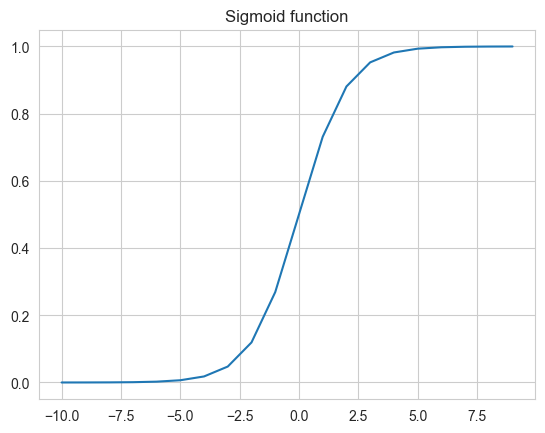

In [7]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

domain = np.arange(-10, 10, 1)
plt.figure(dpi=100)
plt.plot(domain, sigmoid(domain))
plt.title('Sigmoid function')
plt.show()

## Linear Regression

$$J(\omega) = \frac{1}{2}\sum_{k=0}^{n}(x_k\omega^T - y_k)^2 = \frac{1}{2} (X\omega-y)\cdot(X\omega-y)$$ 
$$\frac{\partial{J(\omega)}}{\partial{\omega_l}} =\sum_{k=0}^{n} (x_k\omega^T - y_k)x_k = (X\omega-y)\cdot \hat{x}_l$$ 
$$\nabla J = (X\omega-y)^T X$$


Y si queremos regularización, tenemos que:

Lasso
$$J(\omega) = \sum_{i}|\omega_i|$$
Ridge
$$J(\omega) = \frac{1}{2}\sum_{i}\omega_i^2$$
Y Elastic 
$$J(\omega) = \sum_{i}\rho|\omega_i| +(1-\rho)\frac{1}{2}\omega_i^2$$

In [8]:
class LinearRegression_Ro:
    def __init__(self, mode = 'MiniBatchGD', iterations = 1000, lr = 0.001, batch_size=1000, regularization='Elastic'):
        self.mode = mode
        self.regularization = regularization
        self.iterations = iterations
        self.lr = lr
        self.batch_size = batch_size
        self.W = None
        self.b = None
        self.J = []
        self.Ws = []
    
    def fit(self, X, y):
        N = X.shape[0]
        D = X.shape[1]
        
        self.W = np.random.normal(0, 1, size=(D,1))
        self.Ws.append(self.W)
        
        if self.mode == 'MiniBatch':
            data = np.concatenate((X,y), axis=1)
            np.random.shuffle(data)
            
            for i in range(self.iterations):
                #batch = #shuffle batch and y 
                batch = data[:self.batch_size]
                X_batch = batch[:,:-1]
                y_batch = batch[:,-1:]
                self.W+= -self.lr*(X_batch.dot(self.W) - y_batch).T.dot(X_batch).T
                np.random.shuffle(data)
                self.Ws.append(self.W)
        
        elif self.mode == 'SGD':
            data = np.concatenate((X,y), axis=1)
            
            for i in range(self.iterations):
                random_index = np.random.choice(range(len(data)))
                X_row = data[random_index:random_index+1,:-1]
                y_row = data[random_index:random_index+1,-1:]
                #batch = #shuffle batch and y 
                self.W+= -self.lr*(X_row.dot(self.W) - y_row).T.dot(X_row).T
                self.Ws.append(self.W)
                
        elif self.mode == 'Batch':
            for i in range(self.iterations):
                self.W+= -self.lr*(X.dot(self.W) - y).T.dot(X).T
                print(self.Ws)
                self.Ws.append(self.W)
                inc = np.linalg.norm((self.Ws[-1]-self.Ws[-2])/self.Ws[-2])
                
                if inc < .00005:
                    break
        elif self.mode == 'Closed':
            self.W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        else:
            raise('Error: Method not admited')

In [9]:
X_train = np.random.rand(1000,2)
W_real = np.array([[1],[2]])
y_train = X_train.dot(W_real)+np.random.normal(scale=0.1, size=(1000,1))

model = LinearRegression_Ro(mode='Closed')
model.fit(X_train, y_train)
print('Closed')
print(model.W)

model = LinearRegression_Ro(iterations=1000, lr=.003, mode='MiniBatch')
model.fit(X_train, y_train)
print('\nMini')
print(model.W)

model = LinearRegression_Ro(iterations=10000, lr=.003, mode='SGD')
model.fit(X_train, y_train)
print('\nSGD')
print(model.W)

model = LinearRegression_Ro(iterations=10000, lr=.003, mode='Batch')
model.fit(X_train, y_train)
print('\nBatch')
print(model.W)

Closed
[[1.00210283]
 [2.00869068]]

Mini
[[1.00210283]
 [2.00869068]]

SGD
[[1.05070537]
 [1.95605746]]
[array([[2.09392123],
       [2.9842705 ]])]

Batch
[[2.09392123]
 [2.9842705 ]]


In [10]:
model.mode

'Batch'

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
#y_train = np.random.choice([0,1], size = (100,1))
model.fit(X_train, y_train)
model.coef_

array([[1.00926695, 2.01579424]])

## Logistic Regression 

$$J(\omega) = \frac{1}{2}\sum_{k=0}^{n}(x_k\omega^T - y_k)^2 = \frac{1}{2} (X\omega-y)\cdot(X\omega-y)$$ 
$$\frac{\partial{J(\omega)}}{\partial{\omega_l}} =\sum_{k=0}^{n} (x_k\omega^T - y_k)x_k = (X\omega-y)\cdot \hat{x}_l$$ 
$$\nabla J = (X\omega-y)^T X$$